In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import numpy as np
import tensorflow as tf
import os
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import sys
sys.path.append('..')
from dataset import batcher

In [4]:
BUCKET = False
TFRECORDS_DIR = '../data/pollution_tfrecords/'

In [135]:
# Carbon Monoxide and Consumption Correlation

# Split dataset
INPUT_SHAPE = (224, 224, 1)
co_batcher = batcher.Batcher(
    bands=['CO'], country_year='pollution-2018', image_shape=INPUT_SHAPE, bucket=BUCKET, batch_size=2785, shuffle=False, repeat=1, split="all"
).get_dataset()

# Get carbon monoxide and consumption values stats
co = []
co_consumption = []
for x, y in co_batcher:
    co.append(x)
    co_consumption.append(y)
    
co = np.squeeze(co)
co_consumption = np.squeeze(co_consumption)
    
co = np.mean(co, axis=(1, 2))
   
r2 = pearsonr(co, co_consumption)[0]

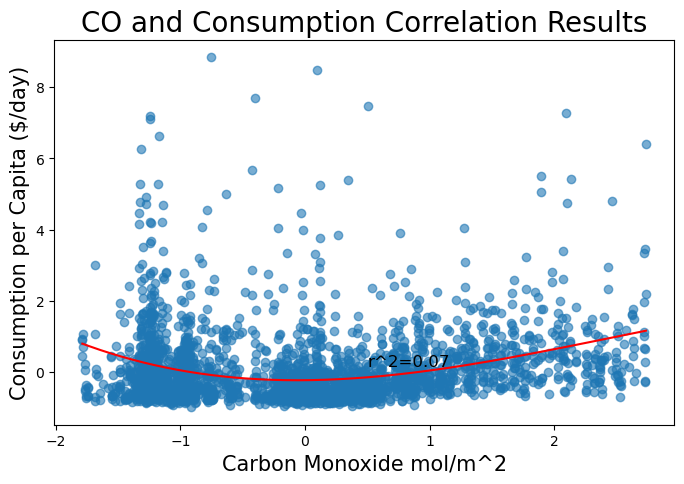

In [136]:
# Plot predictions
fig = plt.figure(figsize=(8,5))
plt.scatter(co, co_consumption, alpha=0.6)
plt.plot(np.unique(co), np.poly1d(np.polyfit(co, co_consumption, 3))(np.unique(co)), color='red')
plt.text(0.5, 0.5, f'r^2={round(r2, 2)}', ha='left', va='top', size=12)
plt.xlabel('Carbon Monoxide mol/m^2', fontsize=15)
plt.ylabel('Consumption per Capita ($/day)', fontsize=15)
plt.title(f'CO and Consumption Correlation Results', fontsize=20)
plt.show()

In [143]:
# Nightlights and Consumption Correlation

# Split dataset
INPUT_SHAPE = (224, 224, 1)
viirs_batcher = batcher.Batcher(
    bands=['VIIRS'], country_year='pollution-2018', image_shape=INPUT_SHAPE, bucket=BUCKET, batch_size=3511, shuffle=False, repeat=1, split="all"
).get_dataset()

# Get carbon monoxide and consumption values stats
viirs = []
viirs_consumption = []
for x, y in viirs_batcher:
    viirs.append(x)
    viirs_consumption.append(y)
    
viirs = np.squeeze(viirs)
viirs_consumption = np.squeeze(viirs_consumption)
viirs = np.mean(viirs, axis=(1, 2))
   
r2 = pearsonr(viirs, viirs_consumption)[0]

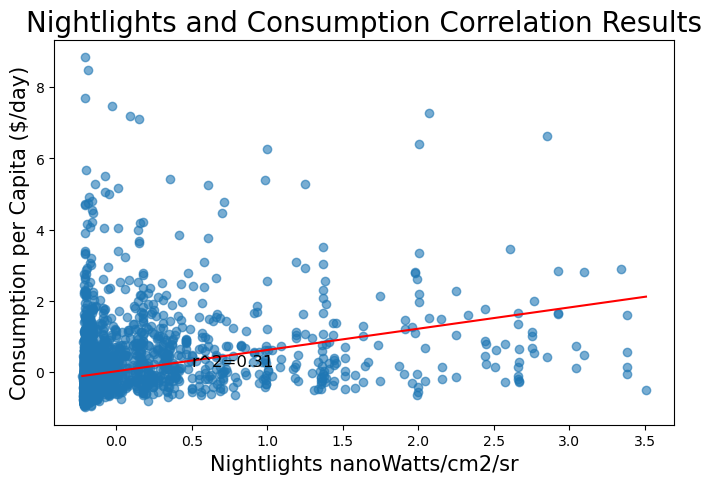

In [144]:
# Plot predictions
fig = plt.figure(figsize=(8,5))
plt.scatter(viirs, viirs_consumption, alpha=0.6)
plt.plot(np.unique(viirs), np.poly1d(np.polyfit(viirs, viirs_consumption, 1))(np.unique(viirs)), color='red')
plt.text(0.5, 0.5, f'r^2={round(r2, 2)}', ha='left', va='top', size=12)
plt.xlabel('Nightlights nanoWatts/cm2/sr', fontsize=15)
plt.ylabel('Consumption per Capita ($/day)', fontsize=15)
plt.title(f'Nightlights and Consumption Correlation Results', fontsize=20)
# plt.xlim([np.min(viirs), 5])
# plt.ylim([np.min(viirs_consumption), 0.25])
plt.show()